<a href="https://colab.research.google.com/github/ma22c041/ma22c041_2023_PL/blob/main/Assignment9/Growth_of_confrmed_COVID_19_cases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import os
!pip install gitpython
from git import Repo
import matplotlib.pyplot as plt
import geopandas as gpd
import urllib
import shutil
%matplotlib inline

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.0/190.0 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.1 MB/s eta 0:00:00


In [ ]:
# your local folder into which you want to download the covid data
covidfolder = '../../data_external/covid19'

In [ ]:
if os.path.isdir(covidfolder): # if repo exists, pull newest data
   repo = Repo(covidfolder)
   repo.remotes.origin.pull()
else: # otherwise, clone from remote
   repo = Repo.clone_from('https://github.com/CSSEGISandData/COVID-19.git', covidfolder)
datadir = repo.working_dir + '/csse_covid_19_data/ csse_covid_19_daily_reports'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from urllib.request import urlretrieve


In [ ]:
# Define the URL for the data file
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"

# Download the data file and save it as 'covid19_data_us.csv'
urlretrieve(url, "covid19_data_us.csv")


('covid19_data_us.csv', <http.client.HTTPMessage at 0x79a184513c40>)

In [ ]:
# Read the CSV file into a DataFrame
df = pd.read_csv("covid19_data_us.csv")

# Filter the data for the states of interest
states = ['Oregon', 'Washington', 'California']
df_states = df[df['Province_State'].isin(states)]


In [ ]:
# Read the CSV file into a DataFrame
df = pd.read_csv("covid19_data_us.csv")

# Filter the data for the states of interest
states = ['Oregon', 'Washington', 'California']
df_states = df[df['Province_State'].isin(states)]


In [ ]:
# Transpose the DataFrame
df_states = df_states.transpose()

# Set the first row as the column headers
df_states.columns = df_states.iloc[0]

# Drop the first row (dates) since it will become the index
df_states = df_states[1:]


An error occurred while converting dates to datetime: Unknown string format: iso2 present at position 0
Data for Oregon not found.
Data for Washington not found.
Data for California not found.


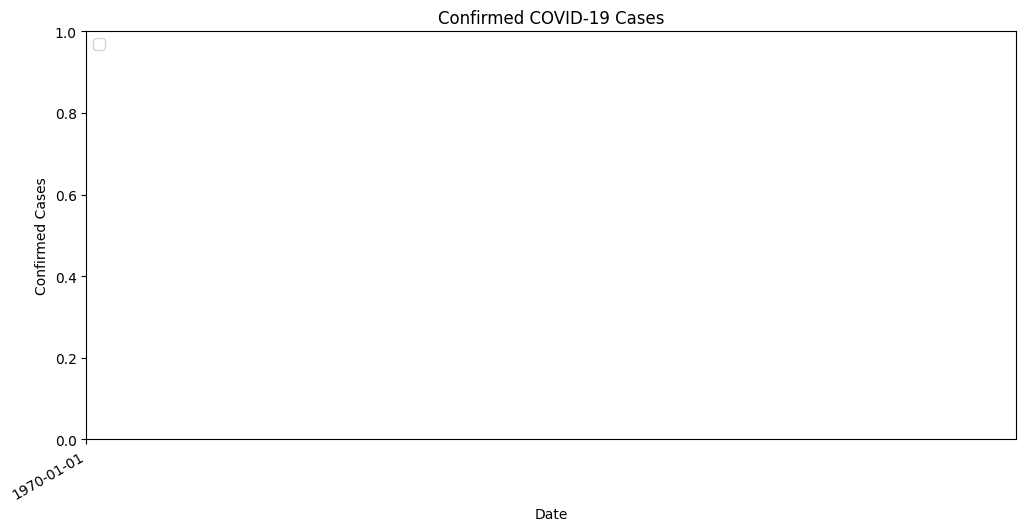

In [50]:
# Ensure the index is in datetime format and handle any errors
try:
    df_states.index = pd.to_datetime(df_states.index)
except ValueError as e:
    print(f"An error occurred while converting dates to datetime: {e}")

# Plot the data
plt.figure(figsize=(12, 6))
for state in states:
    try:
        state_data = df_states[state].astype(int)
        plt.plot(df_states.index, state_data, label=state)
    except KeyError:
        print(f"Data for {state} not found.")

# Format the x-axis with date labels
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gcf().autofmt_xdate()

# Add labels and legend
plt.title("Confirmed COVID-19 Cases")
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.legend(loc='upper left')  # Specify the legend position

# Show the plot
plt.show()


data is  not found